# Monte Carlo Simulation - the 2-D Ising Model
Magnetic properties in matter are generally the result of electron spin interactions. Every electron possesses an inherent angular momentum value ("spin") which gives it a magnetic moment. In the presence of an external magnetic field, the electron spins align either with or against the field - this is why electrons are said to have either "up" or "down" spin.

One useful model for calculating the magnetic properties of a system is [The Ising Model](https://en.wikipedia.org/wiki/Ising_model), devised by Lenz and Ising in the 1920s. The electrons are arranged in a regular square lattice with the simplifying assumption that only nearest-neighbor spins have any effect on each other. <img src="./ising_model.svg" alt="2-d Ising Model" style="width: 200px"/>

The energy of the system is then described by the Hamiltonian

\begin{equation}
H = -J\sum_{(i,j)}s_is_j-h\mu\sum_i s_i,
\end{equation}

where $J$ represents the strength of the spin-spin interaction, $h$ is the external magnetic field, and $\mu$ is the strength of the electron magnetic moment. For the purposes of this simulation, setting $J=h=1$ is sufficient for qualitatively correct results.

To calculate the properties of the system, we use the tools of statistical mechanics to determine what a probable equilibrium state looks like. We gradually move towards equilibrium by applying the [Metropolis-Hastings Algorithm](https://en.wikipedia.org/wiki/Metropolis–Hastings_algorithm), a Monte Carlo simulation method.

# Initial Setup

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


def neighbor_spins(lattice, row, col):
    up = lattice[row-1, col] if row != 0 else lattice[-1, col]
    down = lattice[row+1, col] if row != lattice.shape[0]-1 else lattice[0, col]
    left = lattice[row, col-1] if col != 0 else lattice[row, -1]
    right = lattice[row, col+1] if col != lattice.shape[1]-1 else lattice[row, 0]
    return (up, down, left, right)

def one_step(lattice, beta, h):
    row = np.random.randint(0, lattice.shape[0])
    col = np.random.randint(0, lattice.shape[1]) 
    delta_e = lattice[row, col] * np.sum(neighbor_spins(lattice, row, col))
    if delta_e <= 0 or np.exp(-beta * delta_e) > np.random.uniform():
        lattice[row, col] *= -1
        
def avg_magnetization(lattice):
    return np.sum(lattice) / lattice.size

# Demagnetization of a High-Temperature Ferromagnet

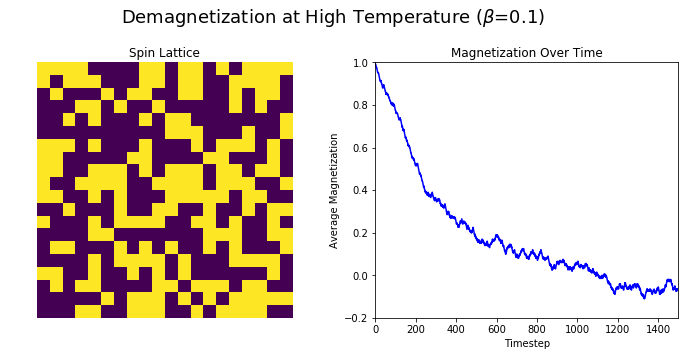

In [49]:
beta = 0.1
h = 0
steps = 1500
steps_per_frame = 10
frame_count = steps // steps_per_frame - 2
step = 0

spin_lattice = np.ones(shape=(20, 20), dtype=int)

x = np.arange(steps)
y = np.ndarray(steps)
y.fill(np.nan)

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10,5))
spins = ax1.imshow(spin_lattice, vmin=-1, vmax=1, animated=True)
mag, = ax2.plot(x, y, 'b')

fig.suptitle(r'Demagnetization at High Temperature ($\beta$=%.1f)' % beta, fontsize=18)
ax1.set_title('Spin Lattice')
ax1.set_axis_off()
ax2.set_title('Magnetization Over Time')
ax2.set_xlim(0, x.size)
ax2.set_ylim(-0.2, 1)
ax2.set_xlabel('Timestep')
ax2.set_ylabel('Average Magnetization')
fig.tight_layout(rect=[0, 0, 1, 0.9]) 

def update(frame):
    global step
    for i in range(steps_per_frame):
        one_step(spin_lattice, beta, h)
        y[step] = avg_magnetization(spin_lattice)
        step += 1
    
    spins.set_data(spin_lattice)
    mag.set_data(x, y)
    return spins, mag,

ani = FuncAnimation(fig, update, frames=frame_count, interval=50, blit=True);
HTML(ani.to_html5_video())